In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [3]:
df = pd.read_csv("WA_Fn-UseC_-Telco-Customer-Churn.csv")
df.iloc[:,-1].value_counts()    # dataset is imbalanced (using smote afterwards)

Churn
No     5174
Yes    1869
Name: count, dtype: int64

In [4]:
df.sample(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
4930,8180-AKMJV,Female,0,No,No,1,Yes,No,DSL,No,...,No,No,No,No,Month-to-month,Yes,Credit card (automatic),44.55,44.55,No
1735,2040-XBAVJ,Male,0,Yes,Yes,72,Yes,Yes,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Two year,No,Bank transfer (automatic),114.45,8100.55,No
3948,4355-CVPVS,Female,0,Yes,Yes,56,Yes,No,Fiber optic,No,...,No,No,Yes,Yes,One year,No,Bank transfer (automatic),88.90,4968,No
6822,5389-FFVKB,Male,1,Yes,No,32,Yes,No,Fiber optic,No,...,No,No,No,Yes,Month-to-month,Yes,Credit card (automatic),80.30,2483.05,Yes
6635,5474-LAMUQ,Male,0,Yes,No,24,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,No,Mailed check,20.10,533.9,No


In [5]:
df.drop('gender', axis=1, inplace=True) # using the EDA step 1
df.drop('PhoneService', axis=1, inplace=True) # using the EDA step 5

Feature Engineering

In [6]:
# EDA Step 2,3,4
# Senior citizens churn more; customers without a partner churn more; customers without dependents churn more.
# The one thing that they all have common is that they all are alone (Generally)
# so make a new feature that explain this
# Create a new feature for customers who have neither a partner nor dependents
df['Is_Independent'] = ((df['Partner'] == 'No') & (df['Dependents'] == 'No')).astype(int)
# we have not included the senior citizen because no row is matching all 3 conditions at a time


In [7]:
# EDA step 7

bins = [0, 12, 48, 73] # Bins for 0-1 year, 1-4 years, >4 years
labels = ['New_Customer', 'Established_Customer', 'Loyal_Customer']
df['TenureGroup'] = pd.cut(df['tenure'], bins=bins, labels=labels, right=False)
df.drop('tenure', axis=1, inplace=True)

In [8]:
df_orig = pd.read_csv("WA_Fn-UseC_-Telco-Customer-Churn.csv")

all_cols = df.columns
forLabel = []
for i in all_cols:
    if(df[i].nunique() <= 2):
        print(f"{i} → {df[i].nunique()} unique values and they are " , df[i].unique())
        forLabel.append(i)
    else:
        continue
    print("\n")
    
print(forLabel)

SeniorCitizen → 2 unique values and they are  [0 1]


Partner → 2 unique values and they are  ['Yes' 'No']


Dependents → 2 unique values and they are  ['No' 'Yes']


PaperlessBilling → 2 unique values and they are  ['Yes' 'No']


Churn → 2 unique values and they are  ['No' 'Yes']


Is_Independent → 2 unique values and they are  [0 1]


['SeniorCitizen', 'Partner', 'Dependents', 'PaperlessBilling', 'Churn', 'Is_Independent']


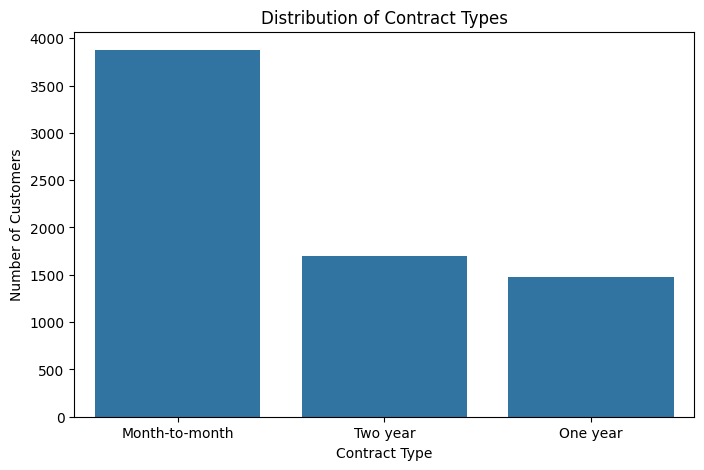

In [9]:
plt.figure(figsize=(8, 5))
sns.countplot(x=df_orig['Contract'], data=df, order=df_orig['Contract'].value_counts().index)
plt.title('Distribution of Contract Types')
plt.xlabel('Contract Type')
plt.ylabel('Number of Customers')
plt.show()

In [10]:
df = df.drop(columns=["customerID"])
df.head(5)

,SeniorCitizen,Partner,Dependents,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,Is_Independent,TenureGroup
0,0,Yes,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,0,New_Customer
1,0,No,No,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No,1,Established_Customer
2,0,No,No,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1,New_Customer
3,0,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,1,Established_Customer
4,0,No,No,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1,New_Customer


Label Encoding

In [11]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
for i in range(len(forLabel)):
    df[forLabel[i]] = label_encoder.fit_transform(df[forLabel[i]])
print(forLabel)
df.head()

['SeniorCitizen', 'Partner', 'Dependents', 'PaperlessBilling', 'Churn', 'Is_Independent']


,SeniorCitizen,Partner,Dependents,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,Is_Independent,TenureGroup
0,0,1,0,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,1,Electronic check,29.85,29.85,0,0,New_Customer
1,0,0,0,No,DSL,Yes,No,Yes,No,No,No,One year,0,Mailed check,56.95,1889.5,0,1,Established_Customer
2,0,0,0,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,1,Mailed check,53.85,108.15,1,1,New_Customer
3,0,0,0,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,0,Bank transfer (automatic),42.30,1840.75,0,1,Established_Customer
4,0,0,0,No,Fiber optic,No,No,No,No,No,No,Month-to-month,1,Electronic check,70.70,151.65,1,1,New_Customer


One Hot Encoding

In [12]:
forOhe = []
for i in df.columns:
    if(df[i].nunique() > 2 and df[i].nunique()<6):
        print(f"{i} → {df[i].nunique()} unique values and they are " , df[i].unique())
        forOhe.append(i)
    else:
        continue
    print("\n")
    
print(forOhe)
# ['tenure', 'MonthlyCharges', 'TotalCharges'] <-- are not for encoding

MultipleLines → 3 unique values and they are  ['No phone service' 'No' 'Yes']


InternetService → 3 unique values and they are  ['DSL' 'Fiber optic' 'No']


OnlineSecurity → 3 unique values and they are  ['No' 'Yes' 'No internet service']


OnlineBackup → 3 unique values and they are  ['Yes' 'No' 'No internet service']


DeviceProtection → 3 unique values and they are  ['No' 'Yes' 'No internet service']


TechSupport → 3 unique values and they are  ['No' 'Yes' 'No internet service']


StreamingTV → 3 unique values and they are  ['No' 'Yes' 'No internet service']


StreamingMovies → 3 unique values and they are  ['No' 'Yes' 'No internet service']


Contract → 3 unique values and they are  ['Month-to-month' 'One year' 'Two year']


PaymentMethod → 4 unique values and they are  ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']


TenureGroup → 3 unique values and they are  ['New_Customer', 'Established_Customer', 'Loyal_Customer']
Categories (3, obj

In [13]:
df = pd.get_dummies(df, columns=forOhe, drop_first=False)

df.head(5)
df.shape

(7043, 42)

In [14]:
df["TotalCharges"] = pd.to_numeric(df["TotalCharges"], errors="coerce")
df["TotalCharges"] = df["TotalCharges"].fillna(0).astype(int)
df["TotalCharges"].dtype

dtype('int32')

Splitting Dataset

In [15]:
x = df.drop("Churn", axis=1)
y = df["Churn"]

In [16]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

Scaling DataSet (not Necessary for Decision Tree)

In [17]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
print(X_train.shape)
print(X_test.shape)
print(y_test.shape)

(5634, 41)
(1409, 41)
(1409,)


In [18]:
from sklearn.decomposition import PCA

pca = PCA(n_components=0.95)  
X_pca = pca.fit_transform(X_train)
X_test_pca = pca.fit_transform(X_test)

print("Original shape:", X_train.shape)
print("Reduced shape:", X_pca.shape)
print("df shape is : ",df.shape)
print(X_train)

Original shape: (5634, 41)
Reduced shape: (5634, 18)
df shape is :  (7043, 42)
[[-0.4397627   1.03247596 -0.65321536 ... -0.64658486 -0.78054756
   1.43595143]
 [ 2.27395367 -0.96854556 -0.65321536 ... -0.64658486  1.28115191
  -0.69640238]
 [-0.4397627   1.03247596  1.53088869 ... -0.64658486 -0.78054756
   1.43595143]
 ...
 [-0.4397627   1.03247596 -0.65321536 ... -0.64658486 -0.78054756
   1.43595143]
 [ 2.27395367 -0.96854556 -0.65321536 ...  1.5465874  -0.78054756
  -0.69640238]
 [-0.4397627  -0.96854556  1.53088869 ...  1.5465874  -0.78054756
  -0.69640238]]


In [ ]:

from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix
from imblearn.pipeline import Pipeline as ImbPipeline
from imblearn.over_sampling import SMOTE


model = RandomForestClassifier(random_state=42, n_jobs=-1,class_weight={0:3,1:4})# this is best recall till now , 75%,74%

smote_pipeline = ImbPipeline(steps=[
    ('smote', SMOTE(random_state=42)),
    ('classifier', model)
    
])

param_grid = {
    'classifier__n_estimators': [100, 200], # the best params are 10 , 100
    'classifier__max_depth': [10, 20]
}


stratified_kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

grid_search = GridSearchCV(
    smote_pipeline,
    param_grid,
    cv=stratified_kfold,
    scoring='roc_auc',
    n_jobs=-1
)

grid_search.fit(X_train, y_train)

print(f"\nBest parameters found: {grid_search.best_params_}")
print(f"Best ROC AUC score on validation set: {grid_search.best_score_:.4f}")

print("\n--- Final Model Evaluation on Test Set ---")


best_model = grid_search.best_estimator_


y_pred = best_model.predict(X_test)
y_pred_proba = best_model.predict_proba(X_test)[:, 1]


print("\nClassification Report:")
print(classification_report(y_test, y_pred))


print(f"Test Set ROC AUC Score: {roc_auc_score(y_test, y_pred_proba):.4f}")

print("\nConfusion Matrix:")
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

ValueError: Invalid parameter 'max_depth' for estimator AdaBoostClassifier(estimator=RandomForestClassifier(class_weight={0: 3, 1: 4},
                                                    n_jobs=-1,
                                                    random_state=42),
                   n_estimators=200, random_state=42). Valid parameters are: ['algorithm', 'estimator', 'learning_rate', 'n_estimators', 'random_state'].